In [1]:
# Imports.
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the data file with pandas.
data_file_path = os.path.join("datasets", "HDB_merged_output.csv")
data = pd.read_csv(data_file_path)

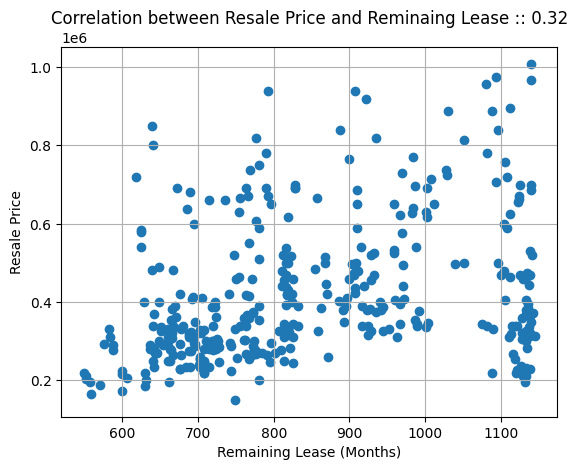

In [2]:
# NOTE: Correlation between remaining lease and resale prices...
def convert_to_months(time_str) -> int:
    """
    To convert years and months into raw number of months...
    """
    years = 0
    months = 0
    if 'years' in time_str:
        years = int(re.search(r'\d+', time_str).group())
    if 'months' in time_str:
        months = int(re.search(r'(\d+)\s*months', time_str).group(1))
    return years * 12 + months

plot_file_name = "resale-price_RELATE_remaining-lease.png"
plot_title = "Correlation between Resale Price and Reminaing Lease"

header1 = 'resale_price'
header2 = 'remaining_lease'

# Convert the reminaing lease to raw number of months first, before correlating
remaining_lease_in_months = data[header2].apply(convert_to_months)
correlation = data[header1].corr(remaining_lease_in_months)
plt.scatter(remaining_lease_in_months, data[header1])

plt.ylabel("Resale Price")
plt.xlabel("Remaining Lease (Months)")
plt.grid(True)

# Use ScalarFormatter for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.title(f"{plot_title} :: {correlation:.2f}")
plt.savefig(plot_file_name, bbox_inches = 'tight')
plt.show()

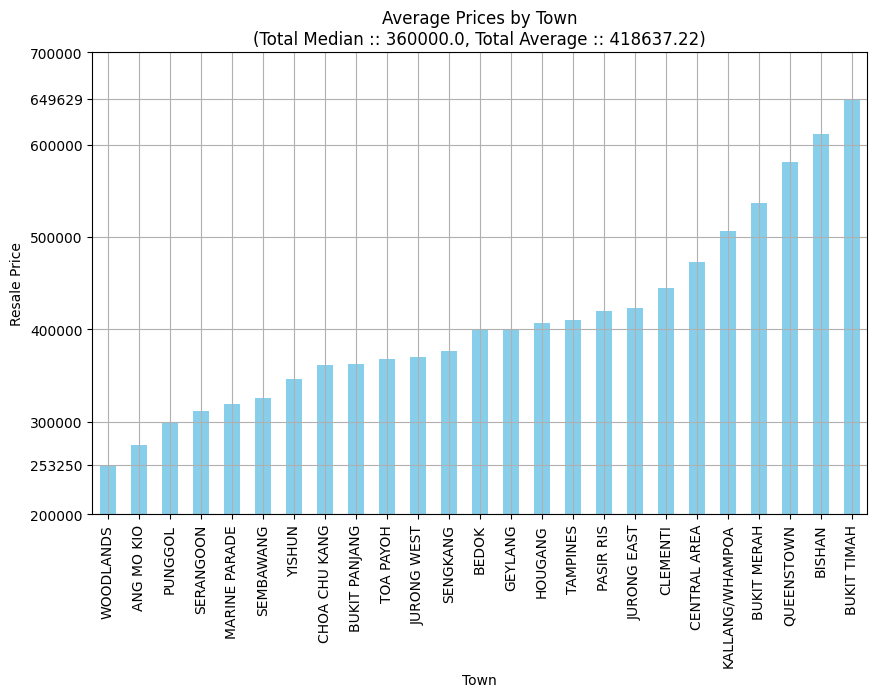

In [3]:
# NOTE: Calculate resale prices by town
plot_file_name = "resale-price_RELATE_town.png"
plot_title = "Average Prices by Town"

header1 = 'resale_price'
header2 = 'town'

avg_prices_by_city = data.groupby(header2)[header1].mean()

plt.figure(figsize=(10, 6))
avg_prices_by_city.sort_values().plot(kind='bar', color='skyblue')
plt.ylabel("Resale Price")
plt.xlabel("Town")
plt.grid(True)

RANGE_OFFSET = 40000
# Set y-axis to limit to focus on resale price range:
y_min = avg_prices_by_city.min() - RANGE_OFFSET
y_max = avg_prices_by_city.max() + RANGE_OFFSET
plt.ylim(y_min, y_max)

# Show the smallest/largest resale price as well...
default_ticks = plt.gca().get_yticks()
custom_ticks = list(default_ticks) + [avg_prices_by_city.min(), avg_prices_by_city.max()]
plt.yticks(ticks=custom_ticks)

# NOTE: Show median and average as well...
median_resale_price = data[header1].median()
average_resale_price = data[header1].mean()


plt.title(plot_title + f"\n(Total Median :: {median_resale_price}, Total Average :: {average_resale_price:.2f})")
plt.savefig(plot_file_name, bbox_inches = 'tight')
plt.show()

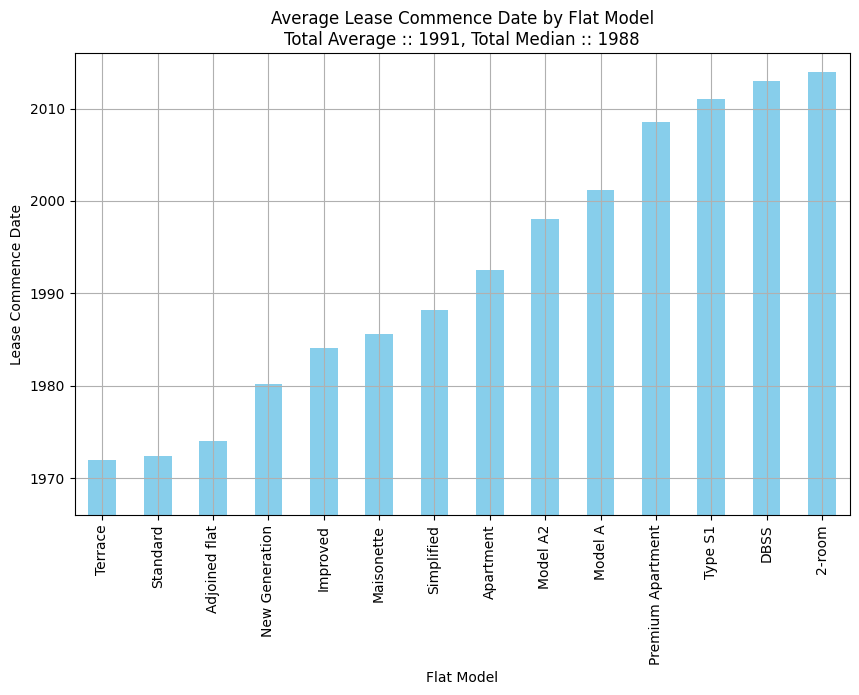

In [4]:
# NOTE: Compare Lease Commence Date and Flat model
plot_file_name = "lease_commence_date_RELATE_flat_model.png"
plot_title = "Average Lease Commence Date by Flat Model"

header1 = 'lease_commence_date'
header2 = 'flat_model'

avg_prices_by_city = data.groupby(header2)[header1].mean()

plt.figure(figsize=(10, 6))
avg_prices_by_city.sort_values().plot(kind='bar', color='skyblue')
plt.ylabel("Lease Commence Date")
plt.xlabel("Flat Model")
plt.grid(True)

# Set y-axis to limit to focus on lease commence date range:
y_min = data[header1].min()
y_max = data[header1].max()
plt.ylim(y_min, y_max)

total_average_lease_commence_date = data[header1].mean()
median_lease_commence_date = data[header1].median()

plt.title(plot_title + f"\nTotal Average :: {total_average_lease_commence_date:.0f}, Total Median :: {median_lease_commence_date:.0f}")
plt.savefig(plot_file_name, bbox_inches = 'tight')
plt.show()

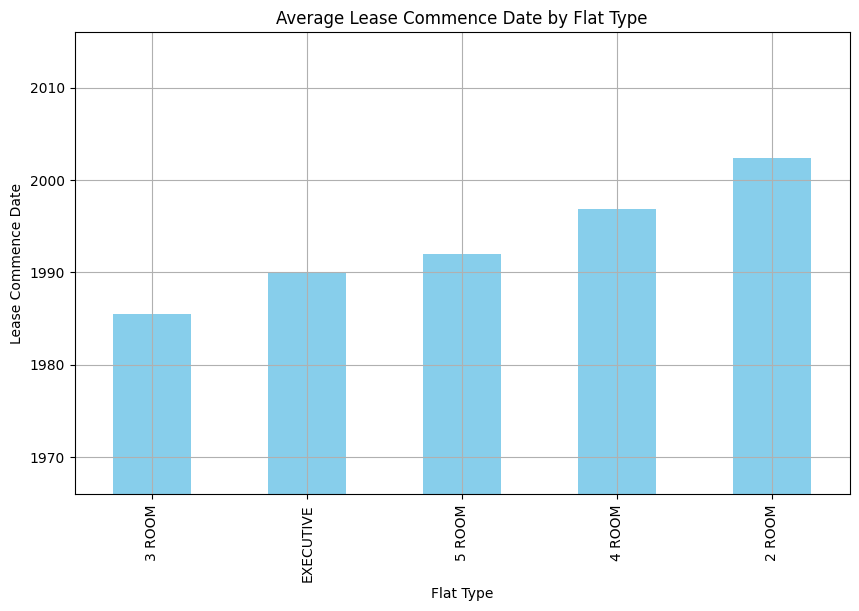

In [5]:
# NOTE: Average Lease Commence date by flat type
plot_file_name = "lease_commence_date_RELATE_flat_type.png"
plot_title = "Average Lease Commence Date by Flat Type"

header1 = 'lease_commence_date'
header2 = 'flat_type'

avg_prices_by_city = data.groupby(header2)[header1].mean()

plt.figure(figsize=(10, 6))
avg_prices_by_city.sort_values().plot(kind='bar', color='skyblue')
plt.ylabel("Lease Commence Date")
plt.xlabel("Flat Type")
plt.grid(True)

# Set y-axis to limit to focus on lease commence date range:
y_min = data[header1].min()
y_max = data[header1].max()
plt.ylim(y_min, y_max)

plt.title(plot_title)
plt.savefig(plot_file_name, bbox_inches = 'tight')
plt.show()